In [60]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
import numpy as np


In [61]:
iris = datasets.load_iris()
#separate the set for teaching and testing, test_size - percentage share (example 70% for training and 30% for testing)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.5)
 

In [62]:
def knn(k):
    predictions = []
    for test in features_test:
        dist = []
        for train in features_train:
            dst = distance.euclidean(test, train)
            dist.append(dst)
        ind = np.argpartition(dist, k)
        k_nearest_labels = labels_train[ind[:k]]
        count_class_occ = dict([x, list(k_nearest_labels).count(x)] for x in set(k_nearest_labels))
        pred = max(count_class_occ, key=count_class_occ.get)
        predictions.append(pred)
    accuracy = accuracy_score(labels_test, predictions)
    return predictions, accuracy

predictions, accuracy = knn(6)
print(f'Accuracy:{accuracy}')

Accuracy:0.9733333333333334


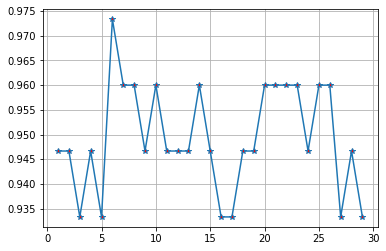

In [63]:
# propozycja najlepszej wartosci k
import matplotlib.pyplot as plt
acc = []
for i in range(1, 30):
    predictions, accuracy = knn(i)
    acc.append(accuracy)
plt.plot(range(1, 30), acc, marker='*', markerfacecolor='red')
plt.grid()
plt.show()

In [64]:
best_k_val = []
max_k_val = max(acc)
for inx, val in enumerate(acc):
    if val == max_k_val:
        best_k_val.append(inx)

print(f"Najlepsze wartości k:\n{best_k_val}")

Najlepsze wartości k:
[5]


In [65]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(features_train, labels_train)
pred = neigh.predict(features_test)
print(f'Accuracy:{accuracy_score(labels_test, pred)}')

# to samo

Accuracy:0.9733333333333334


In [66]:
from sklearn import tree
from six import StringIO  
import pydot 
clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)
clf.predict(iris.data[:1, :])
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write("C:\\Users\\tomek\\Documents\\Uczenie maszynowe\\lab5\\iris.pdf")

True

In [67]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from keras.datasets import mnist

# wczytywanie danych
(trainX, trainY), (testX, testY) = mnist.load_data()
 
 
#Ex.1.Divide the data into parameters X and answer y:
 
X = np.concatenate([trainX, testX])
y = np.concatenate([trainY, testY])
# Standardization
for i in range(X.shape[0]):
    X[i,:] = X[i,:]/np.std(X[i,:])
 
# Convert digit 10 -> 0 (error in the dataset)    
y[np.where(y==10)]=0
 
# the height and width of the picture with the number
h = 28
w = 28
 
# Ex 2. Please display the number of digits and the number of pixels per image
print('X_train (images, rows, cols): ' + str(X.shape))
print('Y_train (images): ' + str(trainY.shape))
print(f'Image pixels: {X.shape[1]*X.shape[2]}')

X_train (images, rows, cols): (70000, 28, 28)
Y_train (images): (60000,)
Image pixels: 784


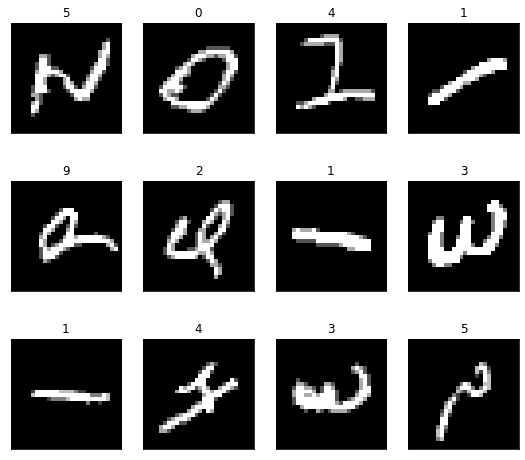

In [68]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

plot_mnist(X, y, h, w)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

In [70]:
DEPTH = 10
clf = tree.DecisionTreeClassifier(max_depth=DEPTH)
print(X_train.shape, y_train.shape)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

(49000, 784) (49000,)


In [71]:
print(f"F1 result\n{f1_score(y_test, y_pred, average=None)}")

F1 result
[0.90361738 0.94958163 0.78135353 0.80138889 0.82477876 0.73703041
 0.86526213 0.8720491  0.78245788 0.7722372 ]


In [72]:
print(f"Confusion matrix\n{confusion_matrix(y_test, y_pred)}")

Confusion matrix
[[1861    0   51   21    3   43   25   15   41   20]
 [   0 2213   38   15    6   14   15   13   20    9]
 [  35   11 1651   60   42   35   60   49   81   18]
 [  12   15   62 1731   18  144   19   47   47   79]
 [  15    7   45   16 1631   45   39   21   17  209]
 [  23   10   52  187   24 1442   32   27   51   70]
 [  37    9   86    5   34   45 1766    4   64   16]
 [   6   12   51   29   39   26    5 1847   16   92]
 [  37   29   99   38   35  108   42   22 1579   95]
 [  13   12   49   44   78   93   13   68   36 1719]]


In [73]:
print(f"Classification raport\n{classification_report(y_test, y_pred)}")

Classification raport
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      2080
           1       0.95      0.94      0.95      2343
           2       0.76      0.81      0.78      2042
           3       0.81      0.80      0.80      2174
           4       0.85      0.80      0.82      2045
           5       0.72      0.75      0.74      1918
           6       0.88      0.85      0.87      2066
           7       0.87      0.87      0.87      2123
           8       0.81      0.76      0.78      2084
           9       0.74      0.81      0.77      2125

    accuracy                           0.83     21000
   macro avg       0.83      0.83      0.83     21000
weighted avg       0.83      0.83      0.83     21000

